<a href="https://colab.research.google.com/github/shideard/fuzzy-logic-implementation/blob/main/Fuzzy_Logic_Irrigation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz

irrigiation_data = pd.read_csv("/content/historical_irrigation_data (1).csv")
irrigiation_data

,Soil Moisture (%),Temperature (°C),Rainfall (mm),Irrigation (L/min)
0,61,23,151,1.646667
1,24,22,58,7.173333
2,81,26,117,0.426667
3,70,16,159,0.353333
4,30,15,95,5.600000
...,...,...,...,...
95,42,19,130,3.833333
96,14,15,147,6.160000
97,50,33,151,3.080000
98,37,24,53,6.040000


In [246]:
# Generate universe variables
x_soil = np.arange(0, 101, 1)
x_temp = np.arange(10, 51, 1)
x_rain  = np.arange(0, 201, 1)
x_irg  = np.arange(0, 11, 1)

In [247]:
# soil moisture
soil_rendah = fuzz.trapmf(x_soil, [0, 0, 20, 40])
soil_sedang = fuzz.trapmf(x_soil, [30, 40, 60, 70])
soil_tinggi = fuzz.trapmf(x_soil, [60, 80, 100, 100])

# temperature
temp_dingin = fuzz.trapmf(x_temp, [10, 10, 18, 25])
temp_sedang = fuzz.trapmf(x_temp, [20, 25, 30, 35])
temp_panas  = fuzz.trapmf(x_temp, [30, 40, 50, 50])

# rainfall
rain_tidakada = fuzz.trapmf(x_rain, [0, 0, 10, 20])
rain_ringan   = fuzz.trapmf(x_rain, [10, 20, 40, 50])
rain_deras    = fuzz.trapmf(x_rain, [50, 100, 200, 200])

# irrigation
irg_rendah = fuzz.trapmf(x_irg, [0, 0, 2, 3])
irg_sedang = fuzz.trapmf(x_irg, [2, 3, 5, 6])
irg_tinggi = fuzz.trapmf(x_irg, [5, 7, 10, 10])

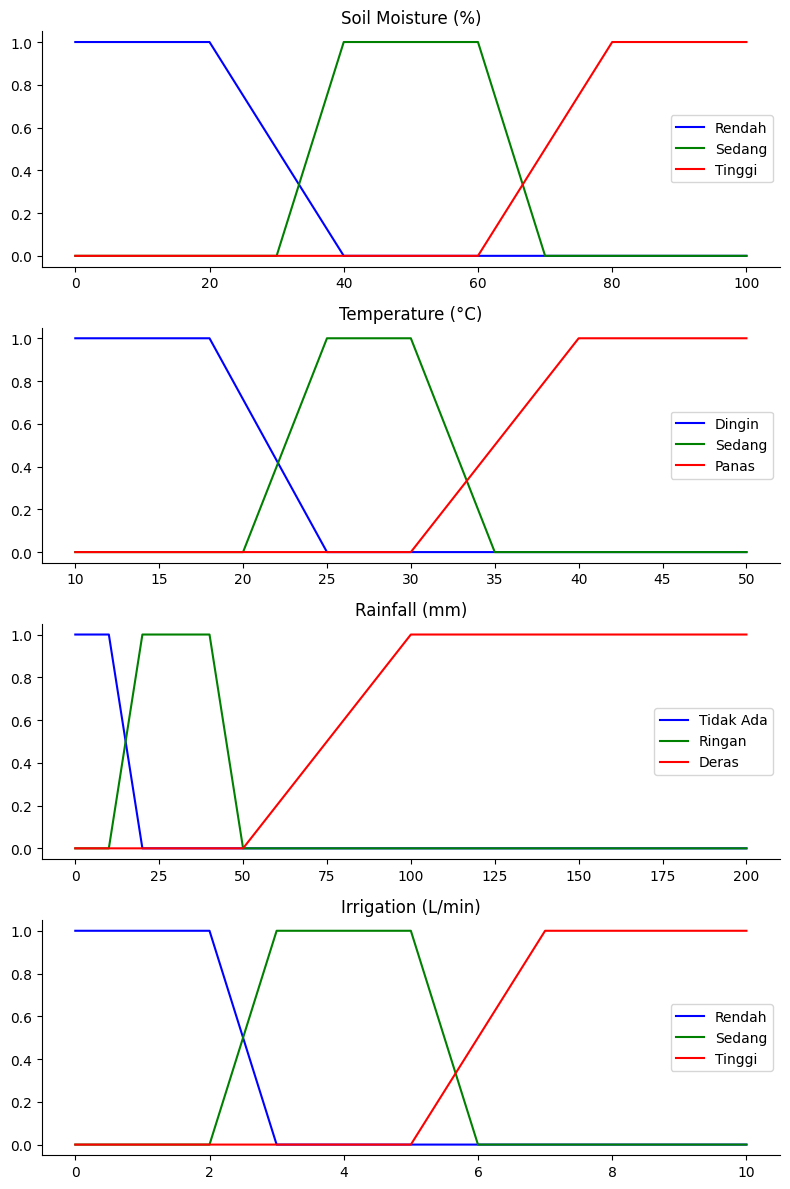

In [248]:
# Visualize universes and membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 12))

ax0.plot(x_soil, soil_rendah, 'b', linewidth=1.5, label='Rendah')
ax0.plot(x_soil, soil_sedang, 'g', linewidth=1.5, label='Sedang')
ax0.plot(x_soil, soil_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax0.set_title('Soil Moisture (%)')
ax0.legend()

ax1.plot(x_temp, temp_dingin, 'b', linewidth=1.5, label='Dingin')
ax1.plot(x_temp, temp_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_temp, temp_panas, 'r', linewidth=1.5, label='Panas')
ax1.set_title('Temperature (°C)')
ax1.legend()

ax2.plot(x_rain, rain_tidakada, 'b', linewidth=1.5, label='Tidak Ada')
ax2.plot(x_rain, rain_ringan, 'g', linewidth=1.5, label='Ringan')
ax2.plot(x_rain, rain_deras, 'r', linewidth=1.5, label='Deras')
ax2.set_title('Rainfall (mm)')
ax2.legend()

ax3.plot(x_irg, irg_rendah, 'b', linewidth=1.5, label='Rendah')
ax3.plot(x_irg, irg_sedang, 'g', linewidth=1.5, label='Sedang')
ax3.plot(x_irg, irg_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax3.set_title('Irrigation (L/min)')
ax3.legend()

for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

In [249]:
# INPUT
input_soil = 80
input_temp = 22
input_rain = 150

In [250]:
soil_level_rendah = fuzz.interp_membership(x_soil, soil_rendah, input_soil)
soil_level_sedang = fuzz.interp_membership(x_soil, soil_sedang, input_soil)
soil_level_tinggi = fuzz.interp_membership(x_soil, soil_tinggi, input_soil)

temp_level_dingin = fuzz.interp_membership(x_temp, temp_dingin, input_temp)
temp_level_sedang = fuzz.interp_membership(x_temp, temp_sedang, input_temp)
temp_level_panas  = fuzz.interp_membership(x_temp, temp_panas, input_temp)

rain_level_tidakada = fuzz.interp_membership(x_rain, rain_tidakada, input_rain)
rain_level_ringan   = fuzz.interp_membership(x_rain, rain_ringan, input_rain)
rain_level_deras    = fuzz.interp_membership(x_rain, rain_deras, input_rain)

In [251]:
# rule 1
active_rule1 = np.fmin(soil_level_rendah, temp_level_panas)
active_rule12 = np.fmin(active_rule1, rain_level_tidakada)
irg1_activation_tinggi = np.fmin(active_rule12, irg_tinggi)

#rule 2
active_rule2 = np.fmin(soil_level_sedang, temp_level_sedang)
active_rule21 = np.fmin(active_rule2, rain_level_ringan)
irg2_activation_sedang = np.fmin(active_rule21, irg_sedang)

# rule 3
active_rule3 = np.fmin(soil_level_tinggi, temp_level_dingin)
active_rule31 = np.fmin(active_rule3, rain_level_deras)
irg3_activation_rendah = np.fmin(active_rule31, irg_rendah)

# rule 4
active_rule4 = np.fmin(soil_level_rendah, temp_level_dingin)
active_rule41 = np.fmin(active_rule4, rain_level_tidakada)
irg4_activation_sedang = np.fmin(active_rule41, irg_sedang)

# rule 5
active_rule5 = np.fmin(soil_level_tinggi, temp_level_panas)
active_rule51 = np.fmin(active_rule5, rain_level_deras)
irg5_activation_rendah = np.fmin(active_rule51, irg_rendah)

# RULE 6
irg6_activation_tinggi = np.fmin(soil_level_rendah, irg_tinggi)

# RULE 7
irg7_activation_rendah = np.fmin(rain_level_deras, irg_rendah)

# RULE 8
active_rule8 = np.fmin(soil_level_sedang, temp_level_sedang)
irg8_activation_sedang = np.fmin(active_rule8, irg_sedang)

irg0 = np.zeros_like(x_irg)

irg_activation_rendah = np.fmax(
    irg3_activation_rendah,
    np.fmax(
        irg5_activation_rendah,
        irg7_activation_rendah
    )
)

irg_activation_sedang = np.fmax(
    irg2_activation_sedang,
    np.fmax(
        irg4_activation_sedang,
        irg8_activation_sedang
    )
)

irg_activation_tinggi = np.fmax(
    irg1_activation_tinggi,
    irg6_activation_tinggi
)

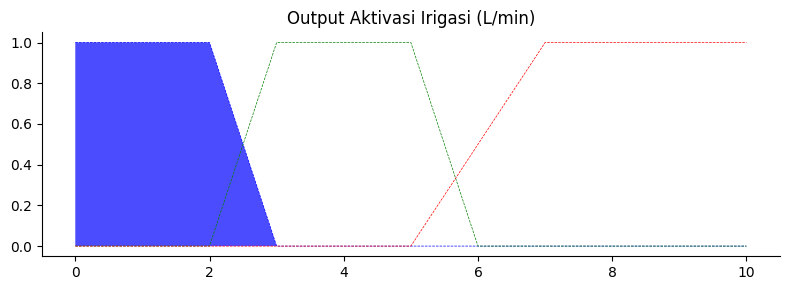

In [252]:
# Visualize aggregated output membership activity
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_irg, irg0, irg_activation_rendah,
                 facecolor='b', alpha=0.7)
ax0.plot(x_irg, irg_rendah, 'b', linewidth=0.5, linestyle='--')

ax0.fill_between(x_irg, irg0, irg_activation_sedang,
                 facecolor='g', alpha=0.7)
ax0.plot(x_irg, irg_sedang, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(x_irg, irg0, irg_activation_tinggi,
                 facecolor='r', alpha=0.7)
ax0.plot(x_irg, irg_tinggi, 'r', linewidth=0.5, linestyle='--')

ax0.set_title('Output Aktivasi Irigasi (L/min)')

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.get_xaxis().tick_bottom()
ax0.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

In [253]:
aggregated = np.fmax(
    irg_activation_rendah,
    np.fmax(
        irg_activation_sedang,
        irg_activation_tinggi
    )
)

# Calculate defuzzified result (Centroid)
irigasi = fuzz.defuzz(x_irg, aggregated, 'centroid')
irigasi_activation = fuzz.interp_membership(x_irg, aggregated, irigasi)

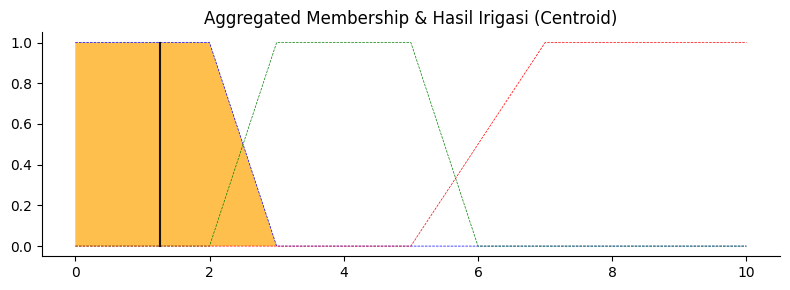

Rekomendasi Irigasi: 1.2666666666666668 L/min


In [254]:
# Visualize aggregated membership and centroid result
fig, ax0 = plt.subplots(figsize=(8, 3))

# Plot original membership functions (garis putus-putus)
ax0.plot(x_irg, irg_rendah, 'b', linewidth=0.5, linestyle='--')
ax0.plot(x_irg, irg_sedang, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_irg, irg_tinggi, 'r', linewidth=0.5, linestyle='--')

# Fill aggregated area
ax0.fill_between(x_irg, irg0, aggregated,
                 facecolor='orange', alpha=0.7)

# Draw centroid line
ax0.plot([irigasi, irigasi],
         [0, irigasi_activation],
         'k', linewidth=1.5, alpha=0.9)

ax0.set_title('Aggregated Membership & Hasil Irigasi (Centroid)')

# Turn off top/right axes
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.get_xaxis().tick_bottom()
ax0.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

print("Rekomendasi Irigasi:", irigasi, "L/min")